In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("df_q.csv")

In [56]:
df.drop(df.columns[0], axis=1, inplace=True)

In [57]:
dfval = df.fillna(-1).values
num_row = dfval.shape[0]
top_50s = []
bottom_50s = []
market_300 = []

for date in range(2, dfval.shape[1]):

    col = dfval[:, [0,date]]
    num_nan = np.sum(col[:,1] < 0)
    sorted_x = np.array(sorted(list(col), key=lambda x: -x[1]))
    
    top_50s.append(np.array(sorted_x[:100])[:,0])
    bottom_50s.append(np.array(sorted_x[num_row-num_nan-100:num_row-num_nan])[:,0])
    market_300.append(np.array(sorted_x[:330])[:,0])

In [58]:
dates = [x[:-7] + x[-4:] for x in df.columns.values[3:]]
tops = np.array(top_50s)
bottoms = np.array(bottom_50s)
markets = np.array(market_300)

In [59]:
tops[len(dates)]

array(['VRSN US  EQUITY', 'MA US  EQUITY', 'KLAC US  EQUITY',
       'SPGI US  EQUITY', 'NKTR US  EQUITY', 'INTU US  EQUITY',
       'MTD US  EQUITY', 'STX US  EQUITY', 'VRTX US  EQUITY',
       'NVDA US  EQUITY', 'TJX US  EQUITY', 'ALLE US  EQUITY',
       'HSY US  EQUITY', 'CLX US  EQUITY', 'ROST US  EQUITY',
       'PAYX US  EQUITY', 'AKAM US  EQUITY', 'LRCX US  EQUITY',
       'TXN US  EQUITY', 'FTV US  EQUITY', 'RHI US  EQUITY',
       'HII US  EQUITY', 'FFIV US  EQUITY', 'ULTA US  EQUITY',
       'AAPL US  EQUITY', 'ALGN US  EQUITY', 'TSCO US  EQUITY',
       'CHRW US  EQUITY', 'EXPD US  EQUITY', 'FAST US  EQUITY',
       'ACN US  EQUITY', 'ROK US  EQUITY', 'ADP US  EQUITY',
       'EA US  EQUITY', 'REGN US  EQUITY', 'CTXS US  EQUITY',
       'SWKS US  EQUITY', 'OMC US  EQUITY', 'ITW US  EQUITY',
       'BKNG US  EQUITY', 'AOS US  EQUITY', 'PEP US  EQUITY',
       'TROW US  EQUITY', 'DRI US  EQUITY', 'GWW US  EQUITY',
       'AMD US  EQUITY', 'AMAT US  EQUITY', 'BBY US  EQUITY',


In [60]:
bottoms[len(dates)]

array(['CMS US  EQUITY', 'HOG US  EQUITY', 'DHR US  EQUITY',
       'PEG US  EQUITY', 'WELL US  EQUITY', 'PLD US  EQUITY',
       'NI US  EQUITY', 'SPG US  EQUITY', 'DVA US  EQUITY',
       'MGM US  EQUITY', 'CAT US  EQUITY', 'NLSN US  EQUITY',
       'HLT US  EQUITY', 'BK US  EQUITY', 'XEL US  EQUITY',
       'MRK US  EQUITY', 'USB US  EQUITY', 'APC US  EQUITY',
       'EQR US  EQUITY', 'EIX US  EQUITY', 'MCD US  EQUITY',
       'DISCA US  EQUITY', 'DISCK US  EQUITY', 'BHGE US  EQUITY',
       'CCI US  EQUITY', 'MDLZ US  EQUITY', 'AMZN US  EQUITY',
       'PPL US  EQUITY', 'KO US  EQUITY', 'ETR US  EQUITY',
       'DPS US  EQUITY', 'WU US  EQUITY', 'JPM US  EQUITY',
       'GGP US  EQUITY', 'ED US  EQUITY', 'FE US  EQUITY',
       'TMO US  EQUITY', 'KMX US  EQUITY', 'IRM US  EQUITY',
       'HCA US  EQUITY', 'ABT US  EQUITY', 'WFC US  EQUITY',
       'QCOM US  EQUITY', 'BAC US  EQUITY', 'BDX US  EQUITY',
       'SLB US  EQUITY', 'AEP US  EQUITY', 'TDG US  EQUITY',
       'HRB US  EQUI

Post Financial Crisis: 2010 - 2018

In [113]:
df_pe = pd.read_csv('spy_pe_est.csv')

In [114]:
df_tot_return = pd.read_csv('spy_total_return_indx.csv')
#mkt_cap = pd.read_csv('spy_market_cap_.csv')
mkt_cap = pd.read_csv('spy_market_cap_more.csv')
df_pb = pd.read_csv('spy_pb_est.csv')

In [115]:
data_price = pd.read_csv("spy_last_price.csv")
data_eps = pd.read_csv("spy_eps.csv")

In [116]:
#df_tot_return = pd.read_csv('mod_total_return.csv')

In [117]:
#val = df_tot_return.values[:, 2:].astype(np.float)
#val.shape[0]

In [118]:
#normalize df_tot_return
#for i in range(val.shape[0]):
    #denominator = val[i, 0]
    #val[i, 0:] = val[i, 0:]/denominator
#v = df_tot_return.values
#v[:, 2:] = val.astype(str)
#df_tot_return[:] = v

In [119]:
new_dates_pb = df_pb.columns.values
df_pb = df_pb.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates_pb})

In [120]:
new_dates = mkt_cap.columns.values
mkt_cap = mkt_cap.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})
df_tot_return = df_tot_return.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [121]:
new_dates_pe = df_pe.columns.values
df_pe = df_pe.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates_pe})

In [122]:
new_dates_eps = data_eps.columns.values
data_eps = data_eps.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates_eps})
new_dates_price = data_price.columns.values
data_price = data_price.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates_price})

In [123]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []
result_topPE = []
result_bottomPE = []

for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    returns = returns.astype(float)
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = percent.astype(float)
    result_top.append((returns * percent / percent.sum()).sum())

In [124]:
#Normalize the return
for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator

In [125]:
dates[len(dates) - 36]

'3/2010'

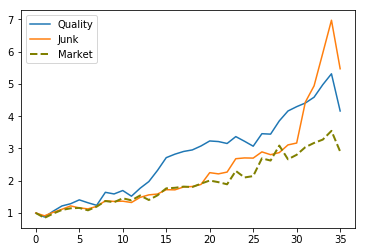

In [126]:
for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    returns = returns.astype(float)
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = percent.astype(float)
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator

for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    returns = returns.astype(float)
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = percent.astype(float)
    result_market.append((returns * percent / percent.sum()).sum())
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    

plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [127]:
result_18 = pd.DataFrame({'top':result_top[:],'market':result_market[:], 'bottom':result_bottom[:]})

In [128]:
result_18.to_csv('result_18.csv')

In [129]:
for i in range(len(dates)-36, len(dates)):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    PB = PB.astype(float)
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = percent.astype(float)
    result_topPB.append((PB * percent / percent.sum()).sum())
    
for i in range(len(dates)-36, len(dates)):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    PB = PB.astype(float)
    percent = percent.astype(float)
    result_bottomPB.append((PB * percent / percent.sum()).sum())

In [130]:
np.nanpercentile(result_bottomPB, 97.5, axis=0)

11.583391140924999

In [131]:
result_bottomPB[14] = np.nanpercentile(result_bottomPB, 97.5, axis=0)
result_topPB[32] = np.nanpercentile(result_topPB, 97.5, axis=0)

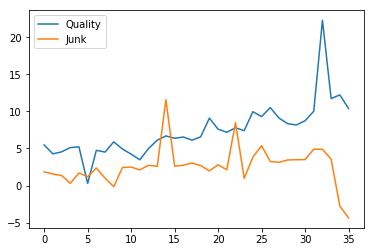

In [132]:
plt.plot(result_topPB, label='Quality')
plt.plot(result_bottomPB, label='Junk')
plt.legend()

In [133]:
result_val_18 = pd.DataFrame({'Quality':result_topPB[:], 'Junk':result_bottomPB[:]})
result_val_18.to_csv('result_val_18.csv')

P/E calculations

In [134]:
for i in range(len(dates)-36, len(dates)):
    PE = df_pe.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    PE = PE.astype(float)
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = percent.astype(float)
    result_topPE.append((PE * percent / percent.sum()).sum())

print(result_topPE)

[63.19295611272148, 63.95740120636672, 57.53904900737283, 58.261175149220364, 80.13994399911974, 83.21690624113438, 134.85777294611663, 116.6902608578449, 72.42944693076397, 12.117575998524623, inf, 44.549728109878835, 45.68226860549604, 76.73879695940833, 54.280945851884894, 75.03722375317497, 79.18687306185814, 86.24576718726706, 86.04511473905917, 75.16253894702673, 102.14664320643907, 95.08006159150627, -1.2066716040261567, 85.97365703639598, 100.43879305451696, 75.25310617918193, 74.62710672863909, inf, 109.40314922986451, 128.6184871462237, 205.03412913323126, -142.95298707274318, 73.64270314756251, 105.8966186188646, 117.70840429556429, 151.61867529413144]


In [135]:
for i in range(len(dates)-36, len(dates)):
    PE = df_pe.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPE.append((returns * percent / percent.sum()).sum())

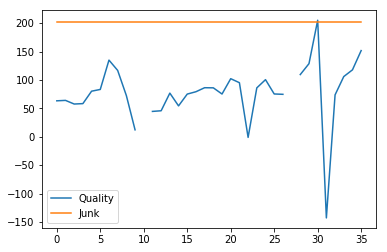

In [136]:
plt.plot(result_topPE, label='Quality')
plt.plot(result_bottomPE, label='Junk')
plt.legend()

2003-2009

In [137]:
dates[len(dates) - 36]
dates[len(dates) - 64]

'3/2003'

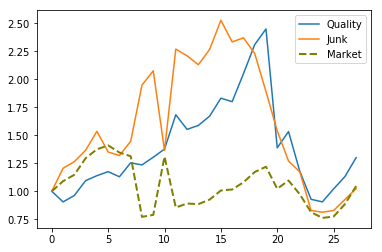

In [138]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []

for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_top.append((returns * percent / percent.sum()).sum())    

for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator
    
for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    result_market.append((returns * percent / percent.sum()).sum())
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [139]:
result_09 = pd.DataFrame({'top':result_top[:],'market':result_market[:], 'bottom':result_bottom[:]})
result_09.to_csv('result_09.csv')

In [1]:
for i in range(len(dates) - 64, len(dates) - 36):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    PB = PB.astype(float)
    percent = percent.astype(float)
    result_topPB.append((PB * percent / percent.sum()).sum())
    
for i in range(len(dates) - 64, len(dates) - 36):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    PB = PB.astype(float)
    percent = percent.astype(float)
    result_bottomPB.append((PB * percent / percent.sum()).sum())
    
plt.plot(result_topPB, label='top')
plt.plot(result_bottomPB, label='bottom')
plt.legend()

NameError: name 'dates' is not defined

2000 - 2002

In [141]:
dates[len(dates)-91]

'6/1996'

In [142]:
tops.shape

(95, 100)

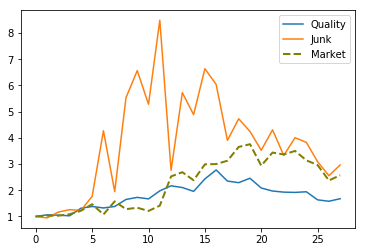

In [143]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []

for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = percent.astype(float)
    result_top.append((returns * percent / percent.sum()).sum())

for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = percent.astype(float)
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = percent.astype(float)
    result_market.append((returns * percent / percent.sum()).sum())

for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator
    

plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [144]:
result_00 = pd.DataFrame({'top':result_top[:],'market':result_market[:], 'bottom':result_bottom[:]})
result_00.to_csv('result_00.csv')

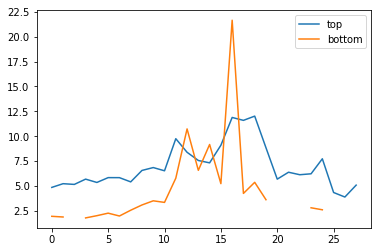

In [145]:
for i in range(len(dates) - 92, len(dates) - 64):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    PB = PB.astype(float)
    percent = percent.astype(float)
    result_topPB.append((PB * percent / percent.sum()).sum())
    
for i in range(len(dates) - 92, len(dates) - 64):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    PB = PB.astype(float)
    percent = percent.astype(float)
    result_bottomPB.append((PB * percent / percent.sum()).sum())
    
plt.plot(result_topPB, label='top')
plt.plot(result_bottomPB, label='bottom')
plt.legend()